In [1]:
import sys
sys.path.insert(1, 'C:/Users/mridu/Documents/Trading Stuff/derivative')
import backtest
sys.path.insert(1, 'C:/Users/mridu/Documents/Trading Stuff/support')
from dates import *

import numpy as np
import random

here


In [2]:
# Variable values to be tested
# variables = np.array([20.0, -10.0, 2, 3, 5, 2.0, 2.0])
variables = np.array([33.,  3.,  3.,  7., 15., 12., 12.])

In [3]:
# a list of dates from start to end, excluding weekends
start_date = "2023-08-06"
end_date = "2023-10-10"
first_expiry = "2023-08-10"
dates = get_weekday_dates(start_date, end_date)
print(dates)
expiries = get_expiry_dates(dates, first_expiry)
print(expiries)

here
['2023-08-07', '2023-08-08', '2023-08-09', '2023-08-10', '2023-08-11', '2023-08-14', '2023-08-15', '2023-08-16', '2023-08-17', '2023-08-18', '2023-08-21', '2023-08-22', '2023-08-23', '2023-08-24', '2023-08-25', '2023-08-28', '2023-08-29', '2023-08-30', '2023-08-31', '2023-09-01', '2023-09-04', '2023-09-05', '2023-09-06', '2023-09-07', '2023-09-08', '2023-09-11', '2023-09-12', '2023-09-13', '2023-09-14', '2023-09-15', '2023-09-18', '2023-09-19', '2023-09-20', '2023-09-21', '2023-09-22', '2023-09-25', '2023-09-26', '2023-09-27', '2023-09-28', '2023-09-29', '2023-10-02', '2023-10-03', '2023-10-04', '2023-10-05', '2023-10-06', '2023-10-09', '2023-10-10']
['2023-08-10', '2023-08-10', '2023-08-10', '2023-08-10', '2023-08-17', '2023-08-17', '2023-08-17', '2023-08-17', '2023-08-17', '2023-08-24', '2023-08-24', '2023-08-24', '2023-08-24', '2023-08-24', '2023-08-31', '2023-08-31', '2023-08-31', '2023-08-31', '2023-08-31', '2023-09-06', '2023-09-06', '2023-09-06', '2023-09-06', '2023-09-13',

In [4]:
stock = "CNXBAN"
lot_size = 15
# expiry = "2023-09-13"
# date = "2023-09-13"

averaging_method = "bilateral"

In [5]:
# RUN IF REQUIRED ONLY

import os
current_directory = os.getcwd()
parent_directory = os.path.dirname(current_directory)
# Set the current working directory to the parent directory
os.chdir(parent_directory)
os.getcwd()

'c:\\Users\\mridu\\Documents\\Trading Stuff'

In [6]:
def objective_function(expiry, date, x):
    # Replace this with your actual objective function
    buy_trigs = [x[0]]
    exit_trigs = [x[1]]
    derivatives_lookback_period = int(x[2])
    derivatives_interval = int(x[3])
    averaging_lookback = int(x[4])
    averaging_sigma_1 = x[5]
    averaging_sigma_2 = x[6]

    params = [stock, expiry, date, "1second", averaging_method, [buy_trigs, exit_trigs, derivatives_lookback_period, derivatives_interval, averaging_lookback, averaging_sigma_1, averaging_sigma_2]]

    print(params)

    b1 = backtest.backtest(params[0], params[1], params[2], params[3], params[4], params[5])
    b1.backtest()
    returns = b1.get_results()
    result = (returns[0][0][0] + returns[1][0][0])*lot_size - (returns[0][0][1] + returns[1][0][1])*45 + (returns[0][0][2]*returns[0][0][3] + returns[1][0][2]*returns[1][0][3])*lot_size
    print("result of objective function = ", result)

    del b1

    return result

In [7]:
def main_test(variables):
    results = []
    for date_index in range(len(dates)):
        try:
            date = dates[date_index]
            expiry = expiries[date_index]
            returns = objective_function(expiry, date, variables)
            results.append([returns, date])
        except FileNotFoundError:
            continue
        # except IndexError:
        #     continue

    return results

In [8]:
results = main_test(variables)

['CNXBAN', '2023-08-10', '2023-08-07', '1second', 'bilateral', [[33.0], [3.0], 3, 7, 15, 12.0, 12.0]]
result of objective function =  -1131.9296555406431
['CNXBAN', '2023-08-10', '2023-08-08', '1second', 'bilateral', [[33.0], [3.0], 3, 7, 15, 12.0, 12.0]]
result of objective function =  -1787.0176400824844
['CNXBAN', '2023-08-10', '2023-08-09', '1second', 'bilateral', [[33.0], [3.0], 3, 7, 15, 12.0, 12.0]]
result of objective function =  -1557.4267659475454
['CNXBAN', '2023-08-10', '2023-08-10', '1second', 'bilateral', [[33.0], [3.0], 3, 7, 15, 12.0, 12.0]]
result of objective function =  -823.378878552129
['CNXBAN', '2023-08-17', '2023-08-11', '1second', 'bilateral', [[33.0], [3.0], 3, 7, 15, 12.0, 12.0]]
result of objective function =  -2466.4889478650866
['CNXBAN', '2023-08-17', '2023-08-14', '1second', 'bilateral', [[33.0], [3.0], 3, 7, 15, 12.0, 12.0]]
result of objective function =  -1934.9723966729157
['CNXBAN', '2023-08-17', '2023-08-15', '1second', 'bilateral', [[33.0], [3.0],

In [9]:
print(*results, sep="\n")

[-1131.9296555406431, '2023-08-07']
[-1787.0176400824844, '2023-08-08']
[-1557.4267659475454, '2023-08-09']
[-823.378878552129, '2023-08-10']
[-2466.4889478650866, '2023-08-11']
[-1934.9723966729157, '2023-08-14']
[810.7322137727167, '2023-08-16']
[-2511.8503138430756, '2023-08-17']
[-2898.1028802566107, '2023-08-18']
[-954.3918017790422, '2023-08-21']
[-199.3136485379175, '2023-08-22']
[2493.2166322512885, '2023-08-23']
[581.6502410051785, '2023-08-24']
[219.84851009918924, '2023-08-25']
[778.2764996222086, '2023-08-28']
[188.51896017844908, '2023-08-29']
[5334.793524537653, '2023-08-30']
[-289.66644076787225, '2023-08-31']
[2614.2336340406296, '2023-09-01']
[-1286.0968135727041, '2023-09-04']
[-1460.3202532549915, '2023-09-05']
[-558.7176772377728, '2023-09-06']
[3465.088373709331, '2023-09-07']
[-1091.1227029880627, '2023-09-08']
[1017.842277566961, '2023-09-11']
[1501.3943689920889, '2023-09-12']
[4945.556772761822, '2023-09-13']
[-3225.5114184860695, '2023-09-14']
[468.19455702934

In [10]:
mean = sum(row[0] for row in results)/len(results)
print(mean)

-330.3198858778973


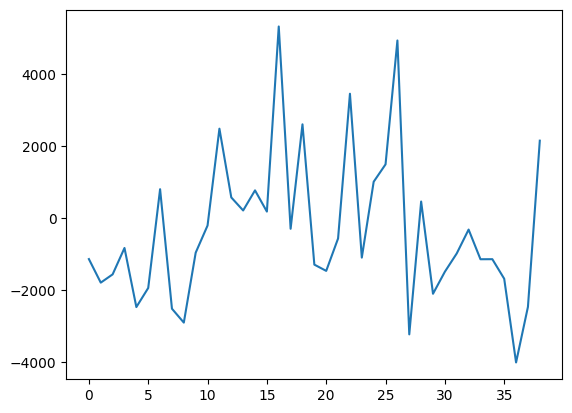

In [11]:
import matplotlib.pyplot as plt

mean = sum(row[0] for row in results)/len(results)
s = []
for i in range(len(results)):
    s.append(results[i][0])
plt.plot(s)

In [12]:
print(len(results))
print(len(dates))

39
47
